# 6. 학습 관련 기술들
- 신경망 학습에서 중요한 주제들에 대해 알아본다. (딥러닝에서 학습의 효율과 정확도를 높일 수 있다.)
 - 가중치 매개변수의 최적값을 탐색하는 최적화(Optimization)
 - 가중치 매개변수 초기값
 - 하이퍼파라미터 설정 방법
- 오버피팅의 대응책으로 가중치 감소와 드롭아웃등의 정규화 방법에 대해 알아본다.
- 배치 정규화

## 1. 매개변수 갱신
- 신경망 학습의 목적은 손실함수의 값을 가능한 한 낮추는 매개변수를 찾는 것이다.
- 매개변수의 최적값을 찾는 문제를 최적화(optimization)라 부른다.
- 앞선 장에서는 매개변수의 기울기를 이용하여 최적의 매개변수 값을 찾았다.
 - SGD (확률적 경사 하강법) : 매개변수의 기울기를 구하여 기울어진 방향으로 매개변수 값을 갱신하는 일을 반복해서 점점 최적의 값에 다가가는 방식


SGD의 단점에 대해 알아보고 SGD보다 나은 성능을 내는 optimization 기법에 대해 알아본다.

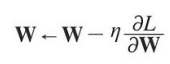

- W : 갱신할 가중치 매개변수
- ŋ : 학습률 (실제로는 0.01이나 0.001과 같은 값을 미리 정해서 사용)
- əL/əW : W에 대한 손실 함수의 기울기
> SGD는 기울어진 방향으로 일정 거리만 가겠다는 단순한 방법


In [2]:
class SGD:
  def __init__(self, lr=0.01):
    self.lr = lr

  def update(self, params, grads):
    for key in params.keys():
      params[key] -= self.lr * grads[key]

 - learning rate인 lr은 인스턴스 변수로 유지.
 - update(params, grads) 메서드는 SGD과정에서 반복해서 호출 (딕셔너리 변수)

In [ ]:
network = TwoLayerNet()
optimizer = SGD()

for i in range(10000):
   x_batch, t_batch = get_mini_batch(...) # 미니배치
   grads = network.gradient(x_batch, t_batch)
   params = network.params
   optimizer.update(params, grads)

 - 사람은 optimizer에 매개변수과 기울기 정보만 넘겨주면 된다. (optimizer가 매개변수 갱신 수행)
 - 최적화를 담당하는 클래스를 분리하여 구현하면 기능을 모듈화 하기 좋다.


 - SGD는 단순하고 구현하기도 쉽지만 문제에 따라서 비효율적이다.
<br>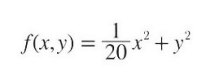

- 위 함수의 최솟값을 구하는 문제이다.
<br>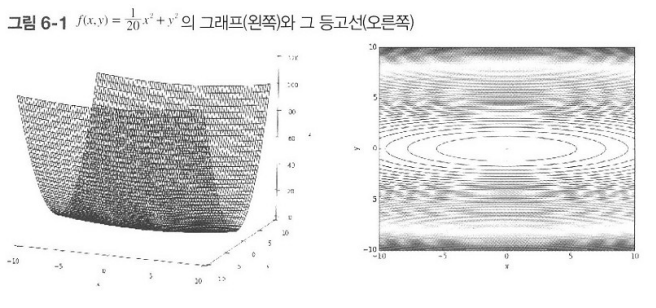

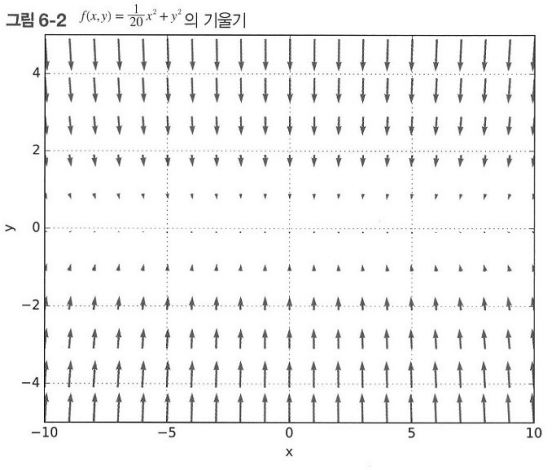

 - 함수의 기울기를 그려보면 위와 같다.
 - Y축의 방향은 크고 X축의 방향이 작다는 특징을 가진다.
 - 최솟값이 되는 장소는 (x, y) = (0 ,0), 아래 그림에서 보여주는 기울기 대부분은 (0,0)방향을 가리키지 않는다.

- 위 함수에 SGD를 적용해본다. ( 초기값 (x, y) = (-7.0, 2.0) )

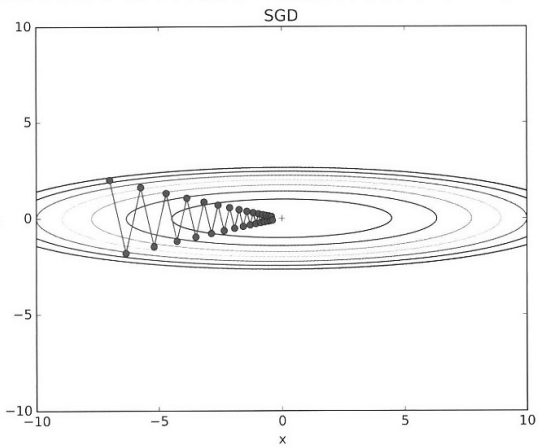

-  SGD에 의한 최적화 갱신 경로를 살펴보면 최솟값인 (0, 0)까지 지그재그 형태로 이동하는 것을 확인할 수 있다. (비효율적이다)
- 위에서 확인한 바와 같이 기울어진 방향이 본래 최솟값과 다른 방향을 가리키고 있기 때문이다.

> **SGD의 단점은 비등방성함수에서는 탐색 경로가 비효율적이라는 점이다.**
> <br>비등방성 함수 (anisotropy function): 방향에 따라서 성질(기울기)이 달라지는 함수

- SGD의 단점을 개선해주는 방법들에 대해 알아본다.
 - Momentum (모멘텀)
 - AdaGrad
 - Adam

 ### 모멘텀
 - 운동량을 뜻하는 단어, 공이 곡면(기울기)을 따라 구르듯 움직이는 이미지를 떠올리면 된다. <br>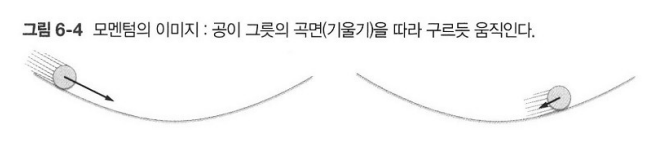


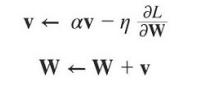

- 모멘텀에서는 velocity를 뜻하는 변수 v가 새로 생겼다.
 - 기울기 방향으로 힘을 받아서 물체가 가속된다는 물리 법칙을 나타낸다.
 - av항은 물체가 아무런 힘을 받지 않을 때 서서히 하강시키는 역할을 한다.(a는 0.9 등의 값으로 설정하고 이는 물리에서 지면 마찰이나 공기 저항에 해당한다.)

In [3]:
import numpy as np

In [4]:
class Momentum:
  def __init__(self, lr=0.01, momentum=0.9):
    self.lr = lr
    self.momentum = momentum
    self.v = None

  def update(self, params, grads):
    if self.v is None:
      self.v = {}
      for key, val in params.items():
          self.v[key] = np.zeros_like(val)

    for key in params.keys():
        self.v[key] = self.momentum*self.v[key] - self.lr*grads[key]
        params[key] += self.v[key]

- 물체의 속도를 의미하는 인스턴스 변수 v는 초기화 때에는 아무 값도 담당하지 않는다.
- 대신 update()가 처음 호출될 때 매개변수와 같은 구조의 데이터를 딕셔너리 변수로 저장한다.<br>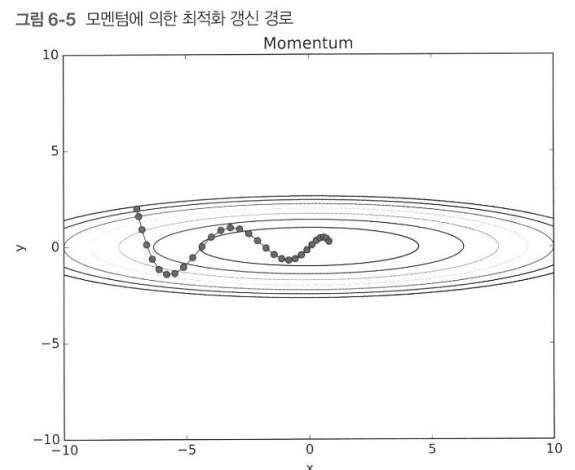

 - SGD의 그래프와 비교하였을 때 지그재그의 정도가 덜한 것을 확인할 수 있다.
 - X축의 힘은 아주 작지만 방향은 변하지 않기 때문에 한 방향으로 일정하게 가속하기 때문이다.
  - 반면 Y축의 힘은 크지만 위 아래로 번갈아 받아서 상충하여 y축 방향의 속도는 안정적이지 않다.

> **모멘텀 : SGD보다 X축 방향으로 빠르게 다가가서 지그재그 움직임이 줄어든다.**

### AdaGrad
- 신경망 학습에서 중요한 Learning Rate를 정하는 기술 중에서 **학습률 감소(Learning rate decay)**를 발전시킨 것이다.
 - 처음에 크게 학습하다가 조금씩 작게 학습한다. 실제 신경망 학습에서 자주 쓰인다.
- Learning rate : lr이 너무 작으면 학습 시간이 너무 길어지고, 반대로 너무 크다면 발산하여 학습이 제대로 이루어지지 않는다.
- AdaGrad는 adaptive하게 학습률을 조정하며 학습을 진행한다.

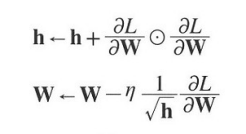

- 새로 생긴 변수 h는 기존 기울기 값을 제곱하여 계속 더해준다.
 - ⊙ : 행렬의 원소별 곱셈
- 매개변수를 갱신할 때 1/루트(h)를 곱하여 lr을 조정.
- 매개변수의 원소 중 많이 움직인(크게 갱신된) 원소는 학습률이 낮아진다는 의미를 가진다.
 - 학습률 감소가 일괄적으로 이루어지지 않고 매개변수의 원소마다 다르게 적용된다.

 - AdaGrad는 과거의 기울기를 계속 더해가는 방식.
  - 학습을 진행할수록 갱신 강도가 약해진다.
  - 무한히 학습을 계속한다면 어느 순간 갱신량이 0이 되어서 전혀 갱신되지 않는 문제가 발생한다.
  - 이를 해결한 기법이 RMSProp이다.
- RMSProp : 먼 과거의 기울기를 서서히 잊고 새로운 기울기 정보를 크게 반영해준다.(과거 기울기의 반영 규모를 기하급수적으로 감소시킨다.) 지수이동평균(Exponential Moving Average; EMA)라고 한다.

In [5]:
class AdaGrad:
  def __init__(self, lr=0.01):
      self.lr = lr
      self.h = None

  def update(self, params, grads):
    	if self.h is None:
          self.h = {}
          for key, val in params.items():
              self.h[key] = np.zeros_like(val)

          for key in params.keys():
            self.h[key] += grads[key] * grads[key]
            params[key] -= self.lr * grads[key] / (np.sqrt(self.h[key]) + 1e-7) #1e-7(작은 값 더해준다) : self.h[key]에 0이 담겨있어도 0으로 나누는 상황을 방지해준다.
            #대부분의 딥러닝 프레임워크에서는 이 값도 인수로 설정할 수 있다.

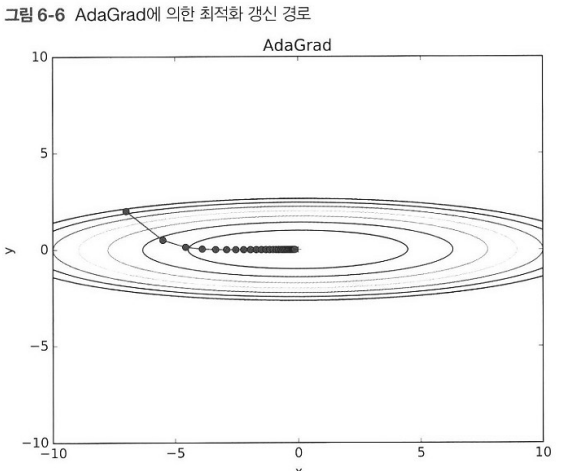

- 최솟값을 향하여 효율적으로 움직이는 것을 확인할 수 있다.
- Y축 방향은 기울기가 크기 때문에 처음에는 크게 움직이지만, 그 큰 움직임에 비례하여 갱신 정도도 큰폭으로 작아지도록 조정된다.

> **AdaGrad : Y축 방향으로 갱신 강도가 빠르게 약해지고 지그재그 움직임이 줄어든다.**

### Adam
- 하이퍼파라미터의 편향 보정이 진행된다.<br>
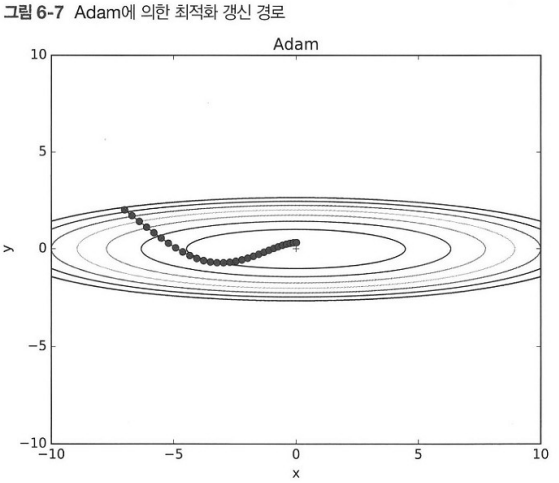

- 모멘텀과 비슷한 패턴인데, 모멘텀 때보다 공의 좌우 흔들림이 적다.
 - 학습의 갱신 강도를 적응적으로 조정해서 얻는 결과다.

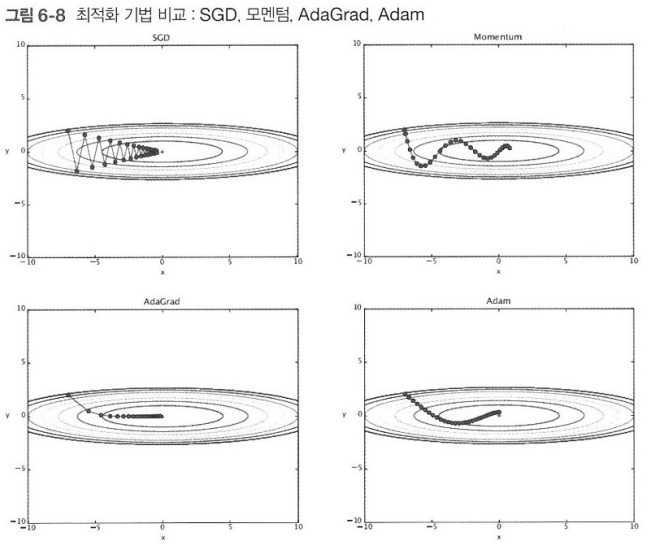

 - 사용한 기법에 따라서 갱신 경로가 다르다.
  - 많은 연구에서 SGD 사용.
  - 모멘텀과 AdaGrad도 시도해볼만한 가치가 있다.
  - 요즘에는 Adam을 많이 사용한다.

Done
Done
Done
Done
Converting train-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting train-labels-idx1-ubyte.gz to NumPy Array ...
Done
Converting t10k-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting t10k-labels-idx1-ubyte.gz to NumPy Array ...
Done
Creating pickle file ...
Done!
===========iteration:0===========
SGD:2.3511968669443712
Momentum:2.2420690779193286
AdaGrad:2.2566073513723115
Adam:2.257900484321458
===========iteration:100===========
SGD:1.5118737666997355
Momentum:0.3044622760798418
AdaGrad:0.12746402679328842
Adam:0.2519394467412267
===========iteration:200===========
SGD:0.7349989405928796
Momentum:0.29407580367231995
AdaGrad:0.14279389814648022
Adam:0.21933830436259033
===========iteration:300===========
SGD:0.48174809432588667
Momentum:0.18654241833293955
AdaGrad:0.07567825084282497
Adam:0.14257550436112842
===========iteration:400===========
SGD:0.47050291878669726
Momentum:0.16907547035531972
AdaGrad:0.07230734600385418
Adam:0.11649566504934487
====

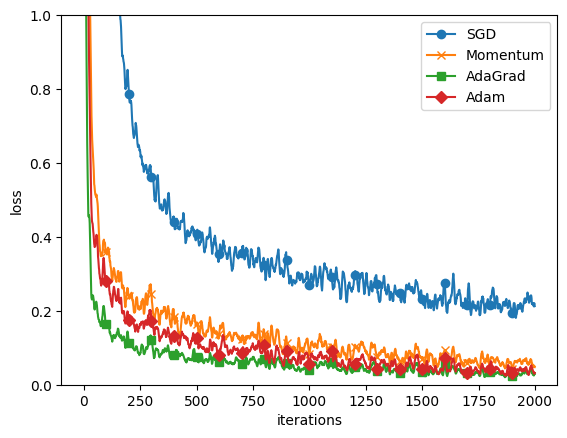

In [6]:
import os
import sys
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import matplotlib.pyplot as plt
from content.dataset.mnist import load_mnist
from content.common.util import smooth_curve
from content.common.multi_layer_net import MultiLayerNet
from content.common.optimizer import *

# 0. MNIST 데이터 읽기==========
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000


# 1. 실험용 설정==========
optimizers = {}
optimizers['SGD'] = SGD()
optimizers['Momentum'] = Momentum()
optimizers['AdaGrad'] = AdaGrad()
optimizers['Adam'] = Adam()
#optimizers['RMSprop'] = RMSprop()

networks = {}
train_loss = {}
for key in optimizers.keys():
    networks[key] = MultiLayerNet(
        input_size=784, hidden_size_list=[100, 100, 100, 100],
        output_size=10)
    train_loss[key] = []


# 2. 훈련 시작==========
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    for key in optimizers.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizers[key].update(networks[key].params, grads)

        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)

    if i % 100 == 0:
        print( "===========" + "iteration:" + str(i) + "===========")
        for key in optimizers.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))


# 3. 그래프 그리기==========
markers = {"SGD": "o", "Momentum": "x", "AdaGrad": "s", "Adam": "D"}
x = np.arange(max_iterations)
for key in optimizers.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 1)
plt.legend()
plt.show()

## 2. 가중치의 초깃값
- 권장 초깃값에 대하여 알아보고 실험을 통하여 실제로 신경망 학습이 신속하게 이루어지는 것을 확인한다.


### 초깃값을 0으로 한다.
- 가중치 감소(weight decay) : 오버피팅 억제해 범용 성능을 높이는 테크닉이다. 간단히 말하자면 가중치 매개변수의 값이 작아지도록 학습하는 방법이다.
 - 가중치 값을 작게 하여 오버피팅이 일어나지 않게 하는 것이다.
- 가중치 초깃값은 0.01 * np.random.randn(10, 100)처럼 정규분포에서 생성되는 값을 0.01배 한 작은 값(표준편차가 0.01인 정규분표)
<br><br>
- 가중치의 초깃값을 모두 0으로 설정한다면
 - 학습이 올바로 이루어지지 않는다.


> 가중치를 균일한 값으로 설정하면 안된다.<br>
> 그 이유는 오차역전파법에서 모든 가중치의 값이 똑같이 갱신되기 때문이다.

- 두 번째 층의 뉴런에 같은 값이 입력된다는 것은 역전파 때 두 번째 층의 가중치가 모두 똑같이 갱신된다는 뜻이다. (곱셈노드의 backprop)
 - 가중치들은 같은 초깃값에서 시작하고 갱신을 거쳐도 여전히 같은 값을 유지
- 가중치를 여러 개 갖는 의미를 사라지게 한다.
 - 가중치의 대칭적인 구조를 무너뜨리려면 초깃값을 무작위로 설정해야 한다.

### 은닉층의 활성화값 분포
- 은닉층의 활성화값(활성화 함수의 출력 데이터)의 분포를 관찰하면 중요한 정보를 얻을 수 있다.
- 가중치의 초깃값에 따라 은닉층 활성화값들이 어떻게 변화하는지 본다.
 - 활성화 함수로 시그모이드 함수를 사용하는 5층 신경망에 무작위로 생성한 데이터를 흘리며 각 층의 활성화값 분포를 히스토그램으로 그려본다.


In [7]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
	return 1 / (1 + np.exp(-x))

x = np.random.randn(1000, 100) # 1000개의 데이터
node_num = 100 				# 각 은닉층의 노드(뉴런) 수
hidden_layer_size = 5 		# 은닉층이 5개
activations = {} 			# 이곳에 활성화 결과(활성화값)를 저장

for i in range(hidden_layer_size):
  if i != 0:
    x = activations[i-1]

  w = np.random.randn(node_num, node_num) * 1
  a = np.dot(x, w)
  z = sigmoid(a)
  activations[i] = z

위 코드에서는 가중치의 분포에 주의해야한다.
- 표준편차가 1인 정규분포를 이용했는데, 이 분포된 정도(표준편차)를 바꿔가며 활성화값들의 분포가 어떻게 변화하는지 관찰하는 것이 주된 목적이다.


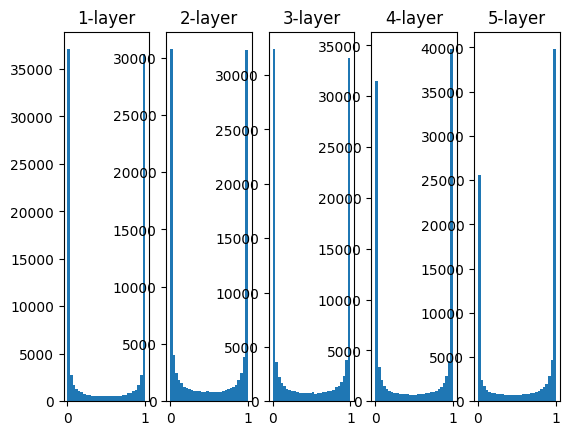

In [8]:
# 히스토그램 그리기
for i, a in activations.items():
  plt.subplot(1, len(activations), i+1)
  plt.title(str(i+1) + "-layer")
  plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

- 가중치를 표준편차가 1인 정규분포로 초기화할 때의 각 층의 활성화값의 분포이다.
  - 시그모이드 함수는 그 출력이 0이나 1에 가까워지자 그 미분은 0에 다가간다.
  - 기울기 소실(gradient vanishing) 문제

이번에는 가중치의 표준편차를 0.01로 바꾸어서 같은 실험을 반복해본다.
앞의 코드에서 가중치 초깃값 설정 부분만 바꾸어서 실행한다.

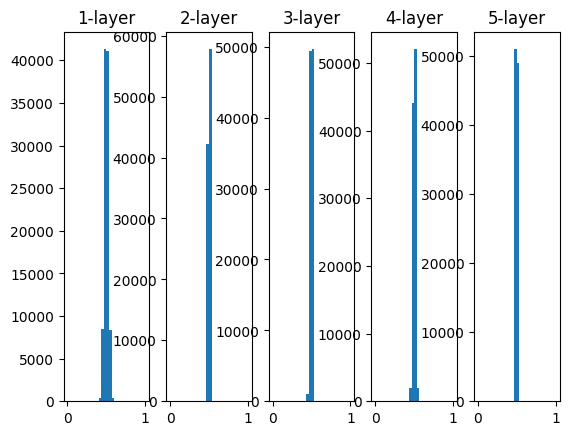

In [9]:
x = np.random.randn(1000, 100) # 1000개의 데이터
node_num = 100 				# 각 은닉층의 노드(뉴런) 수
hidden_layer_size = 5 		# 은닉층이 5개
activations = {} 			# 이곳에 활성화 결과(활성화값)를 저장

for i in range(hidden_layer_size):
  if i != 0:
    x = activations[i-1]

  w = np.random.randn(node_num, node_num) * 0.01
  a = np.dot(x, w)
  z = sigmoid(a)
  activations[i] = z

  # 히스토그램 그리기
for i, a in activations.items():
  plt.subplot(1, len(activations), i+1)
  plt.title(str(i+1) + "-layer")
  plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

- 0.05부근에 집중하여 살펴본다.
 - 0과 1로 치우치지는 않았다.( 기울기 소실 문제 발생 X)
 - 활성화값들이 치우쳤다는 것은 표현력을 제한한다는 과점에서 문제가 있다.
- 다수의 뉴런이 거의 같은 값을 출력하고 있기 때문에, 뉴런을 여러개 둔 의미가 사라진다.

> **각 층의 활성화값은 고루 분포되어야 한다.**<br>
> **층과 층 사이에 적당하게 다양한 데이터가 흐르게 해야 신경망 학습이 효율적으로 이루어지기 때문이다.**

### Xavier 초깃값
- 일반적인 딥러닝 프레임워크들이 표준적으로 이용하고 있는 가중치 초깃값
- 사비에르 글로로트 & 요슈아 벤지오 논문에서 권장하는 가중치 초깃값이다.
 - 이 논문에서 각 층의 활성화값들을 광범위하게 분포시킬 목적으로 가중치의 적절한 분포를 찾고자 했다,
   - 앞 계층의 노드가 n개라면 표준편차가 1/루트(n)인 분포를 사용하면 된다는 결론이다.

- 앞 층에 노드가 많을수록 대상 노드의 초깃값으로 설정하는 가중치가 좁게 펴진다.

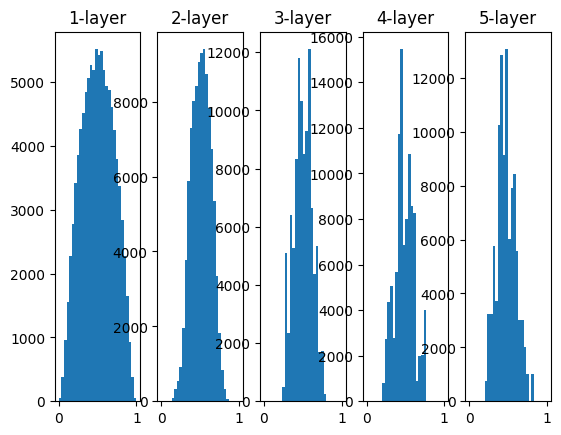

In [10]:
x = np.random.randn(1000, 100) # 1000개의 데이터
node_num = 100 				# 각 은닉층의 노드(뉴런) 수
hidden_layer_size = 5 		# 은닉층이 5개
activations = {} 			# 이곳에 활성화 결과(활성화값)를 저장

for i in range(hidden_layer_size):
  if i != 0:
    x = activations[i-1]

  w = np.random.randn(node_num, node_num) / np.sqrt(node_num)
  a = np.dot(x, w)
  z = sigmoid(a)
  activations[i] = z

  # 히스토그램 그리기
for i, a in activations.items():
  plt.subplot(1, len(activations), i+1)
  plt.title(str(i+1) + "-layer")
  plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

앞에서 보았던 방식들보다 확실히 넓게 분포되어 있음을 확인.
 - 각 층에 흐르는 데이터가 적절하게 퍼져 있으므로 시그모이드 함수의 표현력도 제한받지 않고 학습이 효율적으로 이루어 질것으로 예측 가능하다.


### ReLU를 사용할 때의 가중치 초깃값
- Xavier초깃값은 활성화 함수가 선형이라는 것은 전제로 진행
 - sigmoid, tanh 함수는 좌우 대칭이기때문에 중앙 부근이 선형인 함수이다
 - Xavier 초깃값이 적절하다.
- ReLU를 이용할 때는 특화된 초깃값 이 권장된다.
 - He초깃값
 - He 초깃값은 앞 계층의 노드가 n개일 때, 표준편차가 루트 (2/n)인 정규분포를 사용한다.
 - ReLU는 음의 영역이 0이기 때문에 더 넓게 분포시키기 위하여 2배의 계수가 필요하다

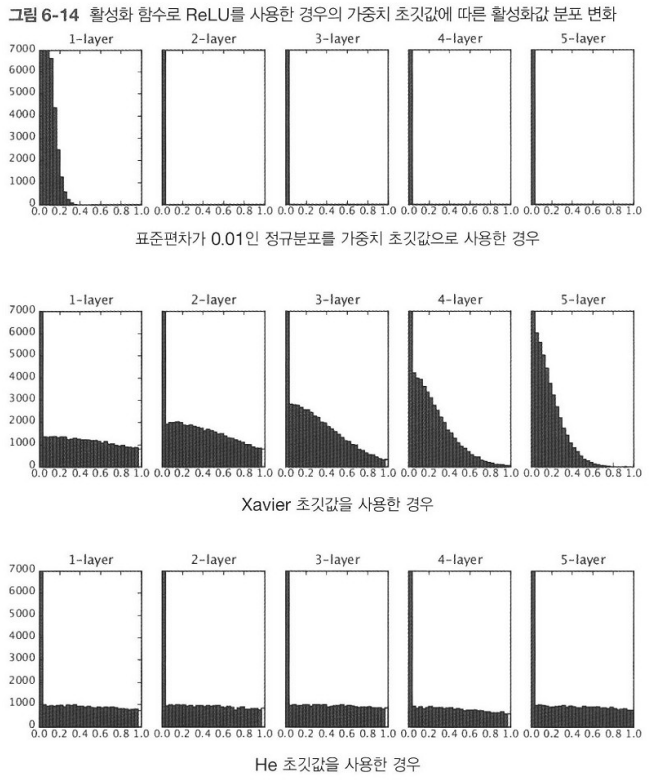

 - 활성화 함수로 ReLU를 이용한 경우의 활성화 값의 분포이다.
  - 표준편차가 0.01인 정규분포(std=0.01)를 초깃값으로 사용한 경우
    - 각 층의 활성화 값들이 아주 작은 값 = 역전파 때 가중치의 기울기 역시 작아진다
    - 학습이 거의 이뤄지지 않는다.
  - Xavier 초깃값을 사용한 경우
    - 층이 깊어지면서 활성화값들의 치우침이 커진다 -> vanishing gradient
  - He 초깃값을 사용한 경우
   - 모든 층에서 균일하게 분포한다 -> 역전파 때도 적절한 값이 나올 것이다.

> **활성화 함수로 ReLU를 사용할 때 = He 초깃값**<br>
> **sigmoid, tanh 등의 S자 모양 곡선일 때 = Xavier 초깃값**

## 3. 배치 정규화 (Batch Normalization)
- 위에서는 가중치의 초깃값을 적절히 설정하여 각 층의 활성화값 분포가 적당히 퍼지면서 학습이 원활히 수행될 수 있음을 알았다.
- 각 층이 활성화를 적당히 퍼뜨릴 수 있도록 강제하는 것
  - 배치 정규화

- 배치 정규화의 장점
  - 학습의 속도가 빨라진다.
  - 초깃값에 크게 의존하지 않는다.
  - 오버피팅을 억제한다.

- **데이터의 분포를 정규화하는 Batch Norm 계층을 신경망에 삽입한다.**

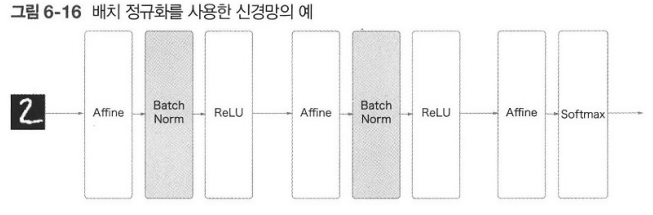

- 배치 정규화는 미니배치를 단위로 정규화
- 구체적으로는 분포가 0, 분산이 1이 되도록 정규화한다.

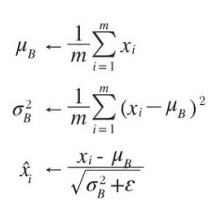

- 미니배치 B={x₁, x₂, ... x_m}이라는 m개의 입력 데이터의 집합에 데해 평균 m_B와 분산 (σ_B)²을 구한다.
- 그리고 입력 데이터를 평균이 0, 분산이 1인 데이터 {^x1, ^x2, ... , ^x_m}이 되게 정규화한다.
- ɛ(epsilon)은 작은 값(ex. 10e-7)으로, 0으로 나누는 사태를 예방한다.

- 미니배치 입력 데이터를 평균 0 , 분산 1인 데이터로 변환하는 처리를 **활성화 함수 앞 or 뒤에 삽입하여 데이터의 분포가 덜 치우치게** 해준다.
- **배치 정규화 계층마다 이 정규화된 데이터에 고유한 확대(scale)와 이동(shift) 변환을 수행한다.**
- 식은 아래와 같다. ɤ가 확대, ß가 이동. 학습하면서 적절한 값으로 조정해나간다.<br>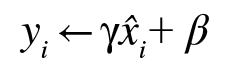

- 배치정규화의 효과에 대해 알아보자
- MNIST 데이터셋을 사용하여 배치 정규화 계층을 사용할 때와 사용하지 않을 때의 학습진도가 어떻게 달라지는지 본다.

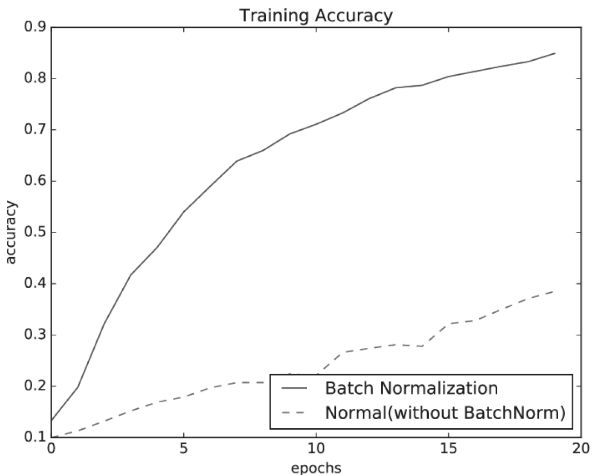

- 배치 정규화가 학습 속도를 높인다는 것을 알 수 있다.


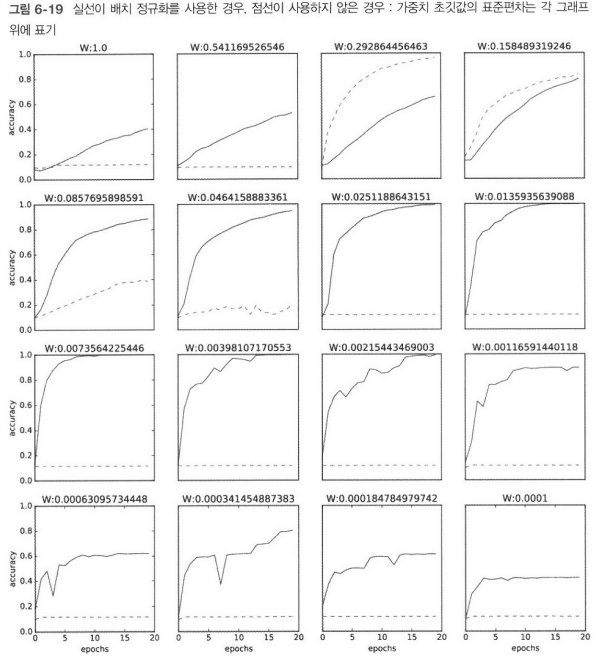

- 대부분의 경우에서 배치 정규화를 사용했을 때의 학습 속도가 빠른 것을 알 수 있다.
- 실제로는, 배치 정규화를 이용하지 않은 경우에는 초깃값이 잘 분포되어 있지 않다면 학습이 전혀 이루어지지 않는다.

> **배치 정규화를 사용하면 학습이 빨라지고, 가중치 초깃값에 크게 의존하지 않아도 된다.**

## 4. 바른 학습을 위해
- 기계학습은 범용성능을 지향하기 때문에 오버피팅을 억제하는 기술이 중요하다.

- 오버피팅이 주로 발생하는 경우는 다음과 같다.
  - 매개변수가 많고, 표현력이 높은 모델(층이 깊은 신경망)
  - 훈련 데이터가 적은 경우

- 일부러 오버피팅을 일으키고 억제하는 기술을 적용해본다.
  - 60,000개인 MNIST 데이터셋의 훈련 데이터 중 300개만 사용하고, 7층 네트워크를 사용해 네트워크의 복잡성을 높인다.
  - 각 층의 뉴런은 100개, 활성화 함수는 ReLU를 사용한다.

epoch:0, train acc:0.08, test acc:0.0876
epoch:1, train acc:0.10333333333333333, test acc:0.1035
epoch:2, train acc:0.2, test acc:0.1454
epoch:3, train acc:0.24333333333333335, test acc:0.1638
epoch:4, train acc:0.2833333333333333, test acc:0.2107
epoch:5, train acc:0.30333333333333334, test acc:0.234
epoch:6, train acc:0.31666666666666665, test acc:0.2562
epoch:7, train acc:0.34, test acc:0.2726
epoch:8, train acc:0.37, test acc:0.2937
epoch:9, train acc:0.4166666666666667, test acc:0.305
epoch:10, train acc:0.47, test acc:0.3386
epoch:11, train acc:0.4766666666666667, test acc:0.3501
epoch:12, train acc:0.55, test acc:0.3838
epoch:13, train acc:0.5733333333333334, test acc:0.41
epoch:14, train acc:0.6033333333333334, test acc:0.435
epoch:15, train acc:0.6133333333333333, test acc:0.4578
epoch:16, train acc:0.6233333333333333, test acc:0.4786
epoch:17, train acc:0.63, test acc:0.493
epoch:18, train acc:0.66, test acc:0.4959
epoch:19, train acc:0.6733333333333333, test acc:0.5195
epoch

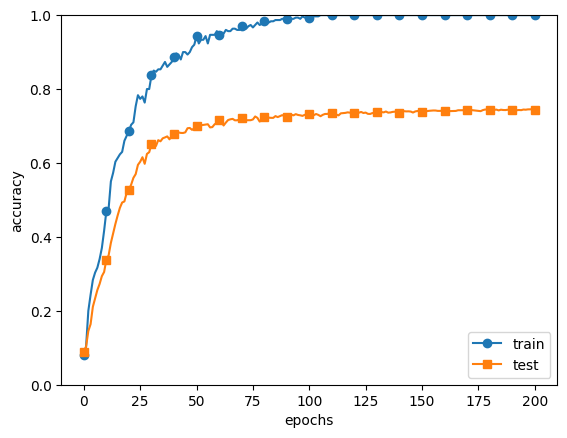

In [12]:
import os
import sys

sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from content.dataset.mnist import load_mnist
from content.common.multi_layer_net import MultiLayerNet
from content.common.optimizer import SGD

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 오버피팅을 재현하기 위해 학습 데이터 수를 줄임
x_train = x_train[:300]
t_train = t_train[:300]

# weight decay（가중치 감쇠） 설정 =======================
weight_decay_lambda = 0 # weight decay를 사용하지 않을 경우
#weight_decay_lambda = 0.1
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        weight_decay_lambda=weight_decay_lambda)
optimizer = SGD(lr=0.01) # 학습률이 0.01인 SGD로 매개변수 갱신

max_epochs = 201
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)
epoch_cnt = 0

for i in range(1000000000):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grads = network.gradient(x_batch, t_batch)
    optimizer.update(network.params, grads)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)

        print("epoch:" + str(epoch_cnt) + ", train acc:" + str(train_acc) + ", test acc:" + str(test_acc))

        epoch_cnt += 1
        if epoch_cnt >= max_epochs:
            break


# 그래프 그리기==========
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

train data와 test data를 사용하여 측정한 정확도가 크게 벌어지고 있다.
 - train data에 fitting
 - 훈련에서 사용하지 않은 범용 데이터에는 대응하지 못하고 있는 상태임을 확인했다.

### 가중치 감소 (weight decay)
- 학습 과정에서 큰 가중치에 대해서는 그에 상응하는 큰 패널티를 부과해서 overfitting을 억제한다.
(오버피팅은 가중치 매개변수의 값이 커서 발생하는 경우가 많기 때문이다.)

  - 가중치의 **제곱 norm(L2 norm)**을 손실함수에 더하여 가중치가 커지는 것을 억제한다.

epoch:0, train acc:0.13666666666666666, test acc:0.1302
epoch:1, train acc:0.14333333333333334, test acc:0.1392
epoch:2, train acc:0.17666666666666667, test acc:0.1516
epoch:3, train acc:0.19333333333333333, test acc:0.1627
epoch:4, train acc:0.21, test acc:0.1764
epoch:5, train acc:0.23333333333333334, test acc:0.1931
epoch:6, train acc:0.25333333333333335, test acc:0.201
epoch:7, train acc:0.26666666666666666, test acc:0.2146
epoch:8, train acc:0.2966666666666667, test acc:0.2252
epoch:9, train acc:0.33666666666666667, test acc:0.2425
epoch:10, train acc:0.3466666666666667, test acc:0.2532
epoch:11, train acc:0.3466666666666667, test acc:0.2586
epoch:12, train acc:0.36666666666666664, test acc:0.2759
epoch:13, train acc:0.39, test acc:0.2878
epoch:14, train acc:0.4033333333333333, test acc:0.3017
epoch:15, train acc:0.42, test acc:0.3156
epoch:16, train acc:0.43333333333333335, test acc:0.3294
epoch:17, train acc:0.4533333333333333, test acc:0.3594
epoch:18, train acc:0.4566666666666

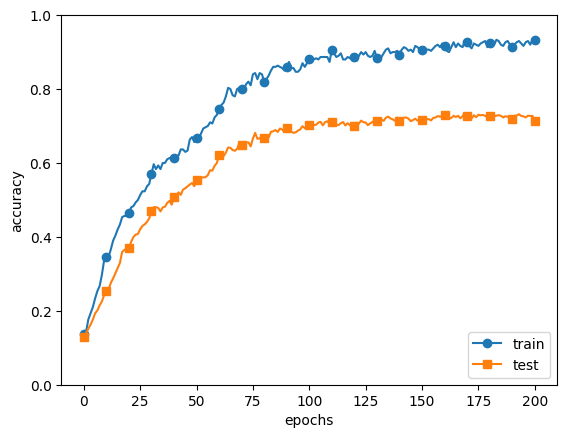

In [13]:
import os
import sys

sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from content.dataset.mnist import load_mnist
from content.common.multi_layer_net import MultiLayerNet
from content.common.optimizer import SGD

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 오버피팅을 재현하기 위해 학습 데이터 수를 줄임
x_train = x_train[:300]
t_train = t_train[:300]

# weight decay（가중치 감쇠） 설정 =======================
#weight_decay_lambda = 0 # weight decay를 사용하지 않을 경우
weight_decay_lambda = 0.1
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        weight_decay_lambda=weight_decay_lambda)
optimizer = SGD(lr=0.01) # 학습률이 0.01인 SGD로 매개변수 갱신

max_epochs = 201
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)
epoch_cnt = 0

for i in range(1000000000):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grads = network.gradient(x_batch, t_batch)
    optimizer.update(network.params, grads)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)

        print("epoch:" + str(epoch_cnt) + ", train acc:" + str(train_acc) + ", test acc:" + str(test_acc))

        epoch_cnt += 1
        if epoch_cnt >= max_epochs:
            break


# 그래프 그리기==========
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

- 가중치 감소는 모든 가중치 각각의 손실 함수에 ½λW²을 더한다.
  - 가중치의 기울기를 구하는 계산에서는 그동안의 오차역전파법에 따른 결과에 정규화 항을 미분한 λW을 더한다.
  - λ는 정규화의 세기를 조절하는 하이퍼파라미터
    - λ을 크게 설정할수록 큰 가중치에 대한 패널티가 커진다.
  - ½은 ½λW²의 미분 결과인 λW를 조정하는 역할의 상수


 - train data에 대한 정확도와 test data에 대한 정확도에 대해 여전히 차이가 존재하지만 감소를 이용하지 않았을 때와 비교하면 그 차이가 줄어든 것을 확인할 수 있다.
    - 오버피팅이 억제되었다.

### 드롭아웃 (Dropout)
- 신경망 모델이 복잡해질 경우 가중치 감소만으로는 대응하기 어렵다.
  - 드롭아웃 적용


**- Dropout : 뉴런을 임의로 삭제하면서 학습하는 방법.**
  - 훈련 때 은닉층의 뉴런을 무작위로 골라서 삭제한다.
    - 삭제된 뉴런은 아래 그림과 같이 신호를 더 이상 전달하지 않는다.
  - 시험 때는 모든 뉴런에 신호를 전달한다.
    - 단, 각 뉴런의 출력에 훈련 때 삭제 안 한 비율을 곱하여 출력한다.

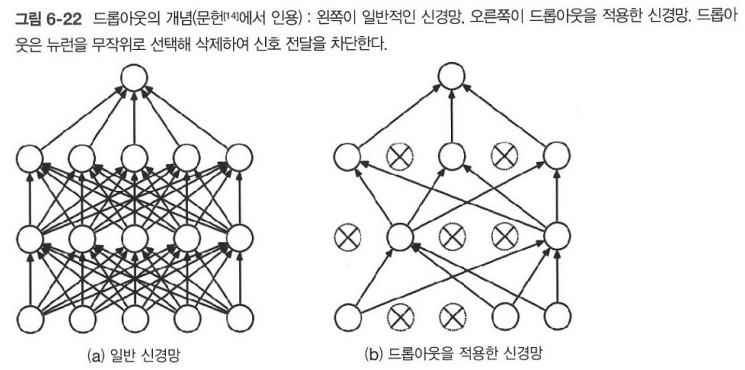

- 드롭아웃을 구현해본다.
- 순전파를 담당하는 forward 메서드에서는 훈련 때(train_flg = True일 때)만 잘 계산해두면 시험 때는 단순히 데이터를 흘리기만 하면 된다.
- 삭제 안 한 비율은 곱하지 않아도 된다. (실제 딥러닝 프레임워크들도 비율을 곱하지 않는다.)

In [14]:
class Dropout:
  def __init__(self, dropout_ratio=0.5):
    self.dropout_ratio = dropout_ratio
    self.mask = None

  def forward(self, x, train_flg=True):
    if train_flg:
        self.mask = np.random.rand(*x.shape) > self.dropout_ratio #x와 형상이 같은 배열을 무작위로 생성하고, 그 값이 dropout_ratio보다 큰 원소만 True로 설정
        return x * self.mask
    else:
        return x * (1.0 - self.dropout_ratio)

  def backward(self, dout):
    return dout * self.mask #역전파 때의 동작은 ReLU와 같이 순전파 때 신호를 통과시키는 뉴런은 역전파 때도 신호를 그대로 통과시키고, 순전파 때 통과시키지 않은 뉴런은 역전파 때도 신호를 차단

- 드롭아웃을 사용했을 때와 사용하지 않았을 때 비교

train loss:2.3047921019361506
=== epoch:1, train acc:0.07333333333333333, test acc:0.096 ===
train loss:2.312654088337934
train loss:2.317439447268284
train loss:2.324576503998045
=== epoch:2, train acc:0.08666666666666667, test acc:0.1002 ===
train loss:2.3011199637929947
train loss:2.319069362961058
train loss:2.3074086635150963
=== epoch:3, train acc:0.09, test acc:0.1046 ===
train loss:2.309823833893864
train loss:2.3302050985223146
train loss:2.3175822179418013
=== epoch:4, train acc:0.09, test acc:0.1066 ===
train loss:2.3120808473948635
train loss:2.310082193590489
train loss:2.305973230190826
=== epoch:5, train acc:0.11333333333333333, test acc:0.1096 ===
train loss:2.311434862492912
train loss:2.3228809307638323
train loss:2.3120233067437437
=== epoch:6, train acc:0.12, test acc:0.1133 ===
train loss:2.308024606877739
train loss:2.3110407103348107
train loss:2.309980510714768
=== epoch:7, train acc:0.12333333333333334, test acc:0.1152 ===
train loss:2.2824682075224088
train lo

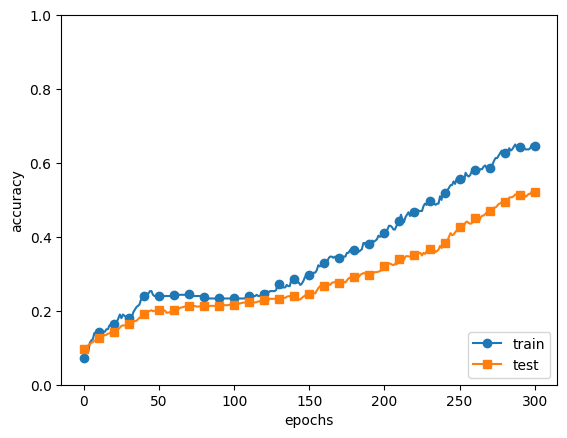

In [15]:
import os
import sys
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from content.dataset.mnist import load_mnist
from content.common.multi_layer_net_extend import MultiLayerNetExtend
from content.common.trainer import Trainer

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 오버피팅을 재현하기 위해 학습 데이터 수를 줄임
x_train = x_train[:300]
t_train = t_train[:300]

# 드롭아웃 사용 유무와 비울 설정 ========================
use_dropout = True  # 드롭아웃을 쓰지 않을 때는 False
dropout_ratio = 0.2
# ====================================================

network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100],
                              output_size=10, use_dropout=use_dropout, dropout_ration=dropout_ratio)
trainer = Trainer(network, x_train, t_train, x_test, t_test,
                  epochs=301, mini_batch_size=100,
                  optimizer='sgd', optimizer_param={'lr': 0.01}, verbose=True)
trainer.train()

train_acc_list, test_acc_list = trainer.train_acc_list, trainer.test_acc_list

# 그래프 그리기==========
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

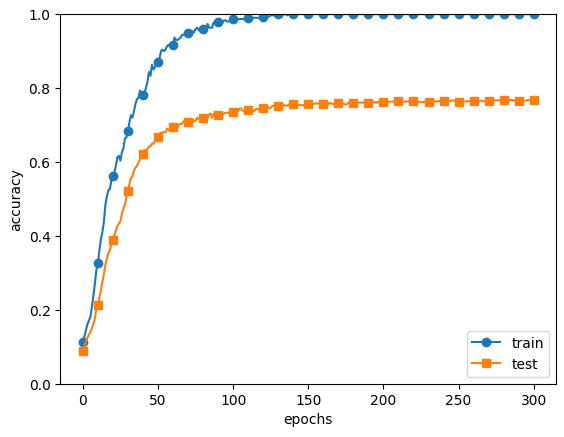

드롭아웃을 적용하였을 때 훈련 데이터와 시험 데이터에 대한 정확도 차이가 줄었음을 확인할 수 있다.

> **드롭아웃을 이용하면 표현력을 높이면서도 오버피팅을 억제할 수 있다.**

- 앙상블 학습 (ensemble learning) :개별적으로 학습시킨 여러 모델의 출력을 평균 내어 추론하는 방식

- 앙상블 학습을 수행하면 신경망의 정확도가 개선된다.

- 드롭아웃 vs 앙상블 학습
- 드롭아웃은 앙상블 학습과 밀접하다.

- 드롭아웃이 학습 때 뉴런을 무작위로 삭제하는 행위를 매번 다른 모델을 학습시키는 것으로 해석할 수 있기 때문이다.

- 드롭아웃이 추론 때 뉴런의 출력에 삭제한 비율을 곱함으로써 앙상블 학습에서 여러 모델의 평균을 내는 것과 같은 효과를 얻을 수 있다.

> 드롭아웃은 앙상블학습과 같은 효과를 (대략) 하나의 네트워크로 구현한 것이다.

## 5. 적절한 하이퍼파라미터 값 찾기
- 하이퍼 파라미터 값을 최대한 효율적으로 탐색하는 방법에 대해 알아본다.

### 검증데이터
- train / test 두가지 data로 분리했다.
- 하이퍼 파라미터의 성능을 평가할 때는 test data를 사용하면 안된다
  - test data를 사용하여 하이퍼파라미터를 조정하면 하이퍼파라미터 값이 시험 데이터에 overfitting 되기 때문이다.

> 범용 성능이 떨어지는 모델이 될 수 있다.

- validation data : 하이퍼 파라미터의 적절성을 평가하는 데이터, 하이퍼 파라미터 조정용 데이터이다.
  - train data : 매개변수 학습
  - validation data : 하이퍼 파라미터 성능 평가
  - test data : 신경망의 범용 성능 평가

- validation data를 얻는 가장 간단한 방법에는 train data 중 20% 정도를 검증 데이터로 먼저 분리하는 방법이 있다.

In [17]:
from content.common.util import shuffle_dataset
(x_train, t_train), (x_test, t_test) = load_mnist()

# 훈련 데이터를 뒤섞는다.
x_train, t_train = shuffle_dataset(x_train, t_train)

# 20%를 검증 데이터로 분할
validation_rate = 0.20
validation_num = int(x_train.shape[0] * validation_rate)

x_val = x_train[:validation_num]
t_val = t_train[:validation_num]
x_train = x_train[validation_num:]
t_train = t_train[validation_num:]

- 이 validation data를 사용해서 하이퍼 파라미터를 최적화하는 기법에 대해 살펴본다.
- 하이퍼 파라미터의 최적 값이 존재하는 범위를 조금씩 좁혀나가는 작업이다.


- 하이퍼 파라미터의 최적화 과정,
  0. 하이퍼 파라미터 값의 범위 설정
  1. 설정된 범위에서 하이퍼 파라미터의 값을 무작위로 추출
  2. 1단계에서 샘플링한 하이퍼파라미터 값을 사용하여 학습하고, validation data로 정확도 평가 (단 에폭 작게)
  3. 1-2 단계 특정 횟수 반복하며 그 정확도의 결과를 보고 하이퍼 파라미터의 범위를 좁혀나간다.

> **신경망에서 하이퍼파라미터 최적화에서는 규칙적인 탐색인 grid search 보다는 무작위로 샘플링하여 탐색하는 것이 더 좋은 결과를 낸다.**

> 범위는 대략적으로 지정하는것이 효과적이다<br>
> log sacle로 지정한다.

학습을 위한 에폭을 작게 하여서 1회 평가에 걸리는 시간을 단축하는것이 효과적이다.

- 하이퍼 파라미터 최적회를 구현해본다.


val acc:0.11 | lr:8.983700980053654e-05, weight decay:1.6634877165102323e-05
val acc:0.47 | lr:0.004421419143084499, weight decay:7.129074121656829e-08
val acc:0.42 | lr:0.003265248269199725, weight decay:1.2360217792857593e-06
val acc:0.07 | lr:6.137634998102518e-06, weight decay:8.279938074623833e-05
val acc:0.06 | lr:4.897506912740465e-06, weight decay:1.1017167238343306e-05
val acc:0.11 | lr:2.094888022575823e-05, weight decay:4.928770846674987e-08
val acc:0.08 | lr:1.3131184733781297e-05, weight decay:1.041862865000981e-08
val acc:0.09 | lr:2.4666007458836758e-05, weight decay:3.0676812733584975e-07
val acc:0.09 | lr:2.216258903001324e-06, weight decay:1.6352046234629493e-05
val acc:0.06 | lr:0.00016759195927731066, weight decay:9.581104417358249e-06
val acc:0.08 | lr:1.0042732372603612e-05, weight decay:1.0869605754852392e-05
val acc:0.1 | lr:6.243862681736159e-05, weight decay:8.959135408058105e-07
val acc:0.11 | lr:0.0004493831224187116, weight decay:2.7179836632221185e-06
val 

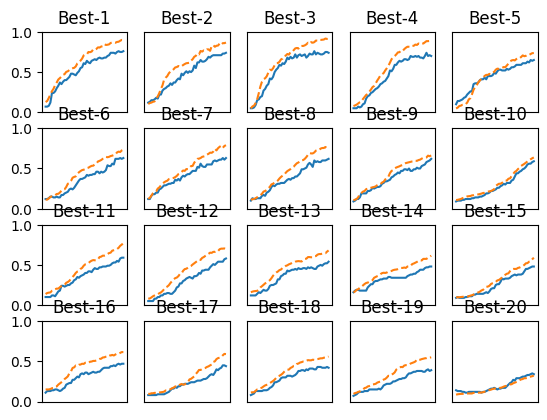

In [18]:
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from content.dataset.mnist import load_mnist
from content.common.multi_layer_net import MultiLayerNet
from content.common.util import shuffle_dataset
from content.common.trainer import Trainer

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 결과를 빠르게 얻기 위해 훈련 데이터를 줄임
x_train = x_train[:500]
t_train = t_train[:500]

# 20%를 검증 데이터로 분할
validation_rate = 0.20
validation_num = int(x_train.shape[0] * validation_rate)
x_train, t_train = shuffle_dataset(x_train, t_train)
x_val = x_train[:validation_num]
t_val = t_train[:validation_num]
x_train = x_train[validation_num:]
t_train = t_train[validation_num:]


def __train(lr, weight_decay, epocs=50):
    network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100],
                            output_size=10, weight_decay_lambda=weight_decay)
    trainer = Trainer(network, x_train, t_train, x_val, t_val,
                      epochs=epocs, mini_batch_size=100,
                      optimizer='sgd', optimizer_param={'lr': lr}, verbose=False)
    trainer.train()

    return trainer.test_acc_list, trainer.train_acc_list


# 하이퍼파라미터 무작위 탐색======================================
optimization_trial = 100
results_val = {}
results_train = {}
for _ in range(optimization_trial):
    # 탐색한 하이퍼파라미터의 범위 지정===============
    weight_decay = 10 ** np.random.uniform(-8, -4)
    lr = 10 ** np.random.uniform(-6, -2)
    # ================================================

    val_acc_list, train_acc_list = __train(lr, weight_decay)
    print("val acc:" + str(val_acc_list[-1]) + " | lr:" + str(lr) + ", weight decay:" + str(weight_decay))
    key = "lr:" + str(lr) + ", weight decay:" + str(weight_decay)
    results_val[key] = val_acc_list
    results_train[key] = train_acc_list

# 그래프 그리기========================================================
print("=========== Hyper-Parameter Optimization Result ===========")
graph_draw_num = 20
col_num = 5
row_num = int(np.ceil(graph_draw_num / col_num))
i = 0

for key, val_acc_list in sorted(results_val.items(), key=lambda x:x[1][-1], reverse=True):
    print("Best-" + str(i+1) + "(val acc:" + str(val_acc_list[-1]) + ") | " + key)

    plt.subplot(row_num, col_num, i+1)
    plt.title("Best-" + str(i+1))
    plt.ylim(0.0, 1.0)
    if i % 5: plt.yticks([])
    plt.xticks([])
    x = np.arange(len(val_acc_list))
    plt.plot(x, val_acc_list)
    plt.plot(x, results_train[key], "--")
    i += 1

    if i >= graph_draw_num:
        break

plt.show()

- 결과를 보면 학습이 잘 진행될 때의 학습률은 0.001~0.01,
- 가중치 감소 계수는 $10^{-8}$~$10^{-6}$
  -이렇게  잘될 것 같은 값의 범위를 관찰하고 범위를 좁혀간다.
- 그 축소된 범위로 똑같은 작업을 반복한다.

> 이렇게 적절한 값이 위치한 범위를 좁혀가다가 특정 단계에서 최종 하이퍼파라미터 값을 하나 선택한다.

## 6. 정리
- 매개변수 갱신 방법
  - SGD
  - 모멘텀
  - AdaGrad
  - Adam
- 가중치 초깃값을 정하는 방법은 올바른 학습을 하는데 매우 중요하다.
    - 활성화 함수로 ReLU를 사용할 때 = He 초깃값
    - sigmoid, tanh 등의 S자 모양 곡선일 때 = Xavier 초깃값
- 배치 정규화를 이용하면 학습을 빠르게 진행할 수 있으며 초깃값에 영향을 덜 받게 된다.
- 오버피팅을 억제하는 정규화 기술
  - 가중치 감소
  - 드롭아웃
- 하이퍼파라미터 값 탐색은 최적 값이 존재할 법한 범위를 점차 좁히면서 하는 것이 효과적이다.